# charger le dataset

In [1]:
import pandas as pd

data1 = pd.read_csv('../dataset_version_4/saved_experiance_low_15p.csv')
data2 = pd.read_csv('../dataset_version_4/saved_experiance_mid_15p.csv')
data3 = pd.read_csv('../dataset_version_4/saved_experiance_high_15p.csv')

data4 = pd.read_csv('../dataset_version_4/saved_experiance_low_60p.csv') 
data5 = pd.read_csv('../dataset_version_4/saved_experiance_mid_60p.csv') 
data6 = pd.read_csv('../dataset_version_4/saved_experiance_high_60p.csv') 

data7 = pd.read_csv('../dataset_version_4/saved_experiance_low_1800p.csv')
data8 = pd.read_csv('../dataset_version_4/saved_experiance_mid_1800p.csv')
data9 = pd.read_csv('../dataset_version_4/saved_experiance_high_1800p.csv')


datas = [data1, data2, data3, data4, data5, data6, data7, data8, data9]

# Voir les information de base
### 1 - size
### 2 - distribution
### 3 - la moyenne du label
### 4 - calculer le nombre d'attaques per periode pour voir comment cette composante réagit

In [2]:
comp = 1
for data in datas :
    if comp == 1: 
        titre = '15 periodes low \n'
    elif comp == 2: 
        titre = '15 periodes mid \n'
    elif comp == 3: 
        titre = '15 periodes high \n'
    elif comp == 4: 
        titre = '60 periodes low \n'
    elif comp == 5: 
        titre = '60 periodes mid \n'
    elif comp == 6: 
        titre = '60 periodes high \n'
    elif comp == 7: 
        titre = '1800 periodes low \n'
    elif comp == 8: 
        titre = '1800 periodes mid \n'
    elif comp == 9: 
        titre = '1800 periodes high \n'
        
    print(f"--------------------{titre} ")
    print(f"1 - Dataset size : {data.shape}\n\n")
    print(f"2 - La distribution du label :\n{data['label_experience'].value_counts(normalize= True)}\n\n")
    print(f"3 - La moyenne du label est : {data['label_experience'].mean()}")
    print("\n")
    comp = comp + 1

--------------------15 periodes low 
 
1 - Dataset size : (560, 6)


2 - La distribution du label :
label_experience
0.700000    0.069643
0.820000    0.067857
0.892000    0.066071
0.935200    0.064286
0.976672    0.060714
              ...   
0.974225    0.001786
0.654004    0.001786
0.671602    0.001786
0.799602    0.001786
0.978872    0.001786
Name: proportion, Length: 109, dtype: float64


3 - La moyenne du label est : 0.9171545218615588


--------------------15 periodes mid 
 
1 - Dataset size : (560, 6)


2 - La distribution du label :
label_experience
0.700000    0.058929
0.820000    0.053571
0.892000    0.042857
0.961120    0.039286
0.935200    0.039286
              ...   
0.937361    0.001786
0.589841    0.001786
0.983764    0.001786
0.823764    0.001786
0.579857    0.001786
Name: proportion, Length: 247, dtype: float64


3 - La moyenne du label est : 0.8363785921565258


--------------------15 periodes high 
 
1 - Dataset size : (560, 6)


2 - La distribution du label :
label

In [3]:
comp = 1
for df in datas:
    unique_periods = df['periode'].unique()
    malicious_counts = []
    for period in unique_periods: 
        df_period = df[df['periode'] == period]
        y = df_period['label_experience']
        malicious_count = (y < 1).sum()
        malicious_counts.append(malicious_count)
    
    if comp == 1: 
        malicious_counts_low_15p = malicious_counts
    elif comp == 2: 
        malicious_counts_mid_15p = malicious_counts
    elif comp == 3: 
        malicious_counts_high_15p = malicious_counts
    elif comp == 4: 
        malicious_counts_low_60p = malicious_counts
    elif comp == 5: 
        malicious_counts_mid_60p = malicious_counts
    elif comp == 6: 
        malicious_counts_high_60p = malicious_counts
    elif comp == 7: 
        malicious_counts_low_1800p = malicious_counts
    elif comp == 8: 
        malicious_counts_mid_1800p = malicious_counts
    elif comp == 9: 
        malicious_counts_high_1800p = malicious_counts
    
    comp +=1

# Voir les depondances entre le Label et les features   

In [4]:
def plot(df, comp):
    if comp == 1: 
        titre = '15 periodes low \n'
    elif comp == 2: 
        titre = '15 periodes mid \n'
    elif comp == 3: 
        titre = '15 periodes high \n'
    elif comp == 4: 
        titre = '60 periodes low \n'
    elif comp == 5: 
        titre = '60 periodes mid \n'
    elif comp == 6: 
        titre = '60 periodes high \n'
    elif comp == 7: 
        titre = '1800 periodes low \n'
    elif comp == 8: 
        titre = '1800 periodes mid \n'
    elif comp == 9: 
        titre = '1800 periodes high \n'
        
    X = df[['Recente', 'Ancienne']]
    y = df['label_experience']
    
    plt.figure(figsize=(8, 4))  # Adjusted figure size for better spacing

    plt.subplot(1, 2, 1)
    plt.scatter(X['Recente'], y)
    plt.xlabel('Recente')
    plt.ylabel('Experiance') 

    plt.subplot(1, 2, 2)
    plt.scatter(X['Ancienne'], y)
    plt.xlabel('Ancienne')
    plt.ylabel('Experiance')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust subplots to fit in the figure area
    plt.figtext(0.5, -0.05, titre, ha='center', fontsize=14, color='green')  
    plt.show()  # Show the current figure

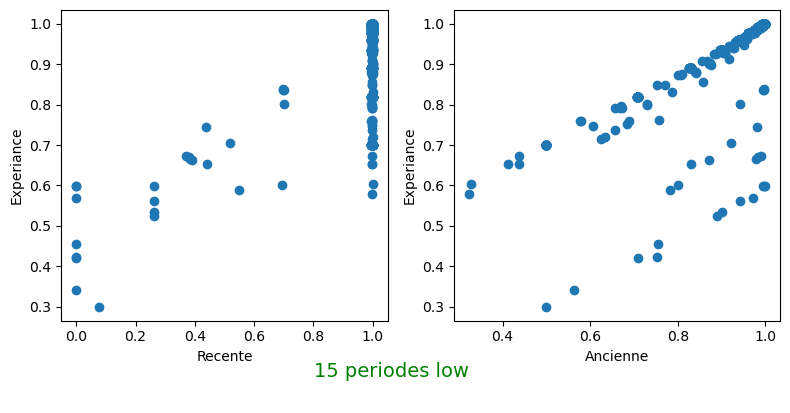

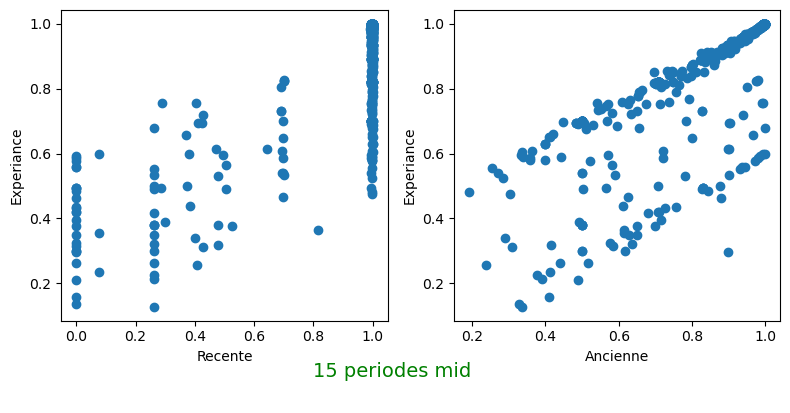

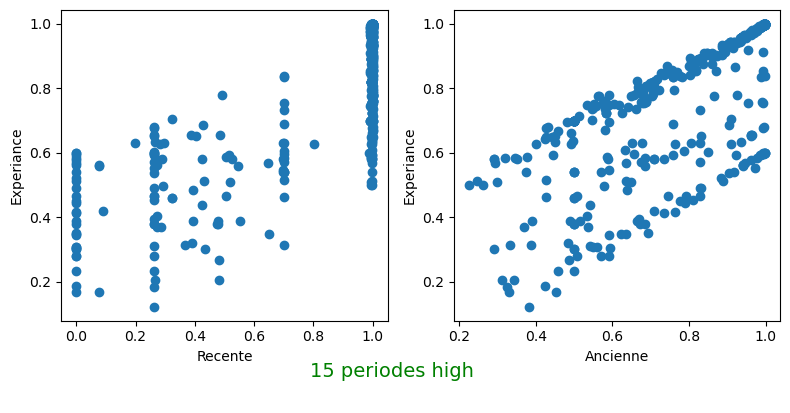

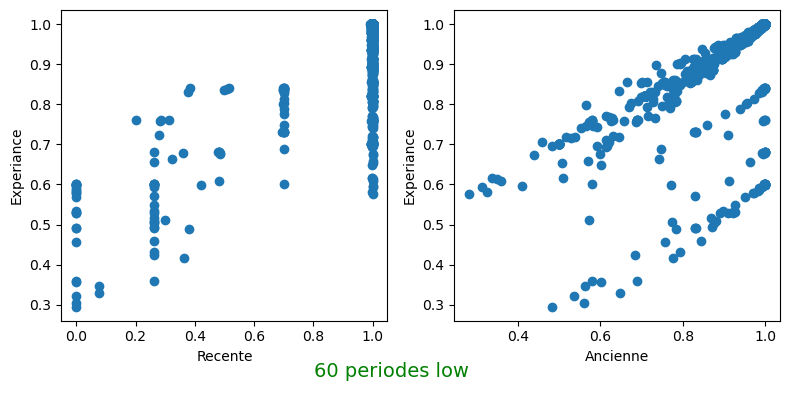

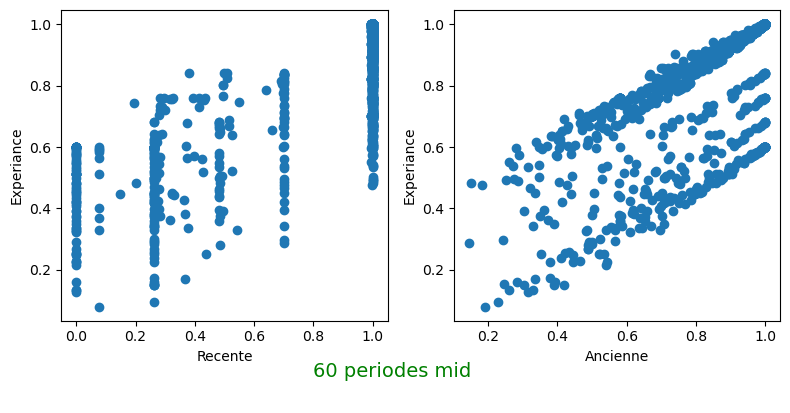

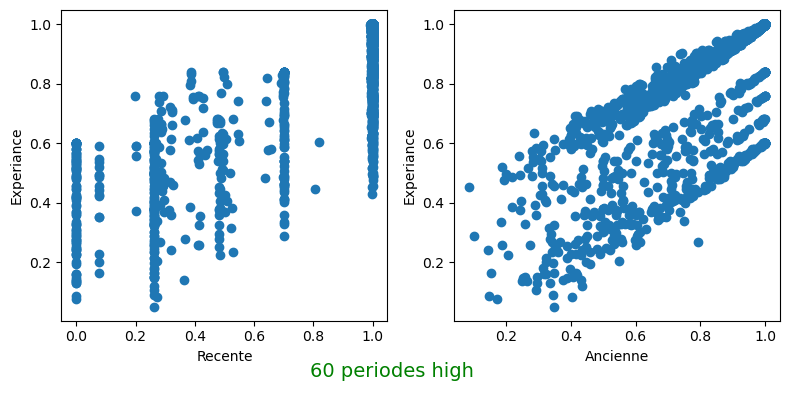

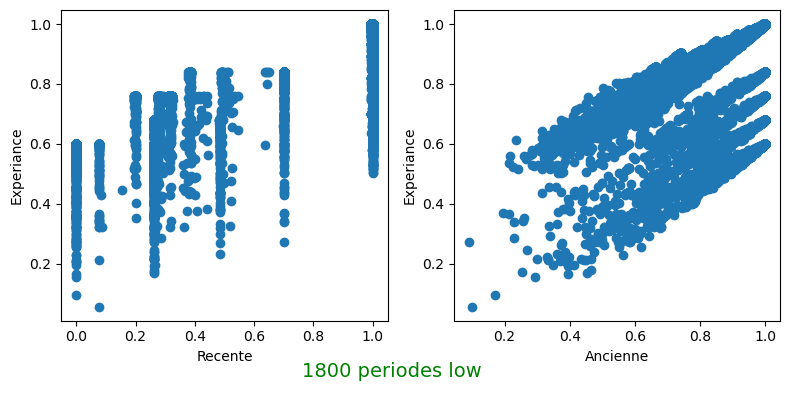

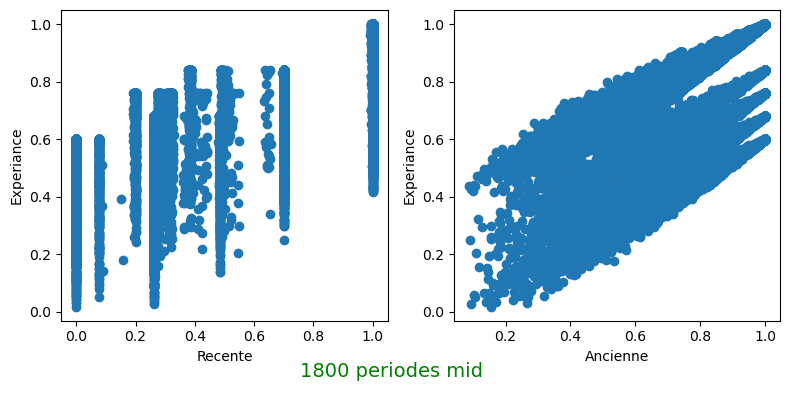

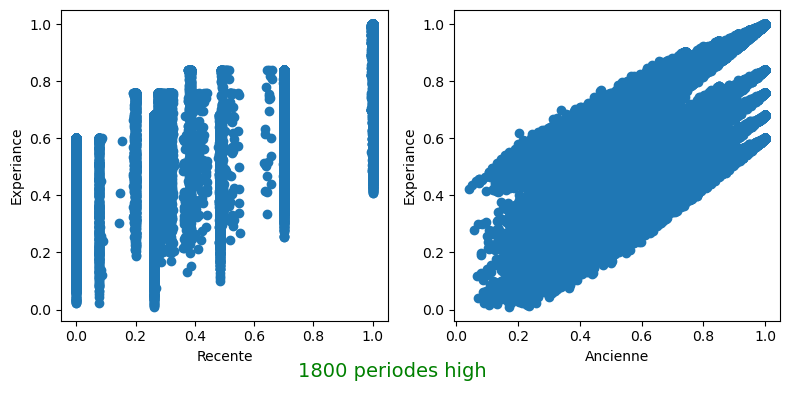

In [6]:
import matplotlib.pyplot as plt
comp = 1
for data in datas:
    plot(data, comp)
    comp += 1

# Model training

## - Model

###  1 - Définition des fonctions objetif et contraintes
###  2 - features, Label splitting, classifier le label pour preparer la crossvalidation
###  3 - trainset, testset splitting & crossvalidation
###  4 - train the model and view the MSE and MAPE scores for the testset

In [7]:
import time
from sklearn.model_selection import train_test_split, StratifiedKFold
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

def objective(coeffs, X, y):
    predictions = np.dot(X, coeffs)
    score = 0
    for pred, actual in zip(predictions, y):
        if actual <= 0.8:
            weight = 3
        else:
            weight = 1
        score += weight * (abs(actual - pred) ) 
    return score / len(predictions)

def constraint_eq(coeffs):
    return np.sum(coeffs) - 1

def MAPE(actuals, predictions):
    mape = 0
    for pred, actual in zip(predictions, actuals):
        mape += abs(pred - actual) * 100
    return mape / len(predictions)

def label_bin(df):
    classes = np.zeros(len(df), dtype=int)    
    for i, value in enumerate(df['label_experience']):
        if value < 0.4:
            classes[i] = 0
        elif value < 0.7:
            classes[i] = 1
        elif value < 1:
            classes[i] = 2         
    return classes

In [8]:
def train_test_model(df, comp) :
    if comp == 1: 
        titre = '15 periodes low \n'
    elif comp == 2: 
        titre = '15 periodes mid \n'
    elif comp == 3: 
        titre = '15 periodes high \n'
    elif comp == 4: 
        titre = '60 periodes low \n'
    elif comp == 5: 
        titre = '60 periodes mid \n'
    elif comp == 6: 
        titre = '60 periodes high \n'
    elif comp == 7: 
        titre = '1800 periodes low \n'
    elif comp == 8: 
        titre = '1800 periodes mid \n'
    elif comp == 9: 
        titre = '1800 periodes high \n'
        
        
    print(f"------------------------------------ {titre}")
    
    # Feature, target splitting
    X = df[['Recente', 'Ancienne']]
    y = df['label_experience']
    
    y_binned = label_bin(df)

    trainset, testset = train_test_split(df, test_size=0.2, random_state=0)


    # stratified Train - Test splitting 
    X_train_full, X_test, y_train_full, y_test, y_binned_train, y_binned_test = train_test_split(
                                                    X, y, y_binned, test_size=0.2, random_state=0, stratify=y_binned)
      

    # initialiser les coef
    initial_coeffs = np.array([1/2, 1/2])

    # Define the constraints in a form acceptable by `minimize`
    cons = [
        {'type': 'eq', 'fun': constraint_eq},
        {'type': 'ineq', 'fun': lambda x: x[0]},  # a >= 0
        {'type': 'ineq', 'fun': lambda x: x[1]},  # b >= 0
    ]
    
    best_coeffs = np.array([1/2, 1/2])
    mse_scores = [] 
    mape_scores = []
    
    # stratified Cross-validation on the train set
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    

    start_time = time.time()  # Start time
    for train_index, val_index in kf.split(X_train_full, y_binned_train):
        X_train = X_train_full.iloc[train_index] 
        y_train = y_train_full.iloc[train_index]
        X_val =  X_train_full.iloc[val_index]
        y_val = y_train_full.iloc[val_index]

        result = minimize(objective, initial_coeffs, args=(X_train, y_train), constraints=cons)
        coeffs = result.x

        predictions = np.dot(X_val, coeffs)

        mse = mean_squared_error(y_val, predictions)
        mape = MAPE(y_val, predictions)

        mse_scores.append(mse)
        mape_scores.append(mape)

        if mse < mean_squared_error(y_val, np.dot(X_val, best_coeffs)):
            best_coeffs = coeffs

    # Evaluate on the test set using the best coefficients found during cross-validation
    final_predictions = np.dot(X_test, best_coeffs)
    final_mse = mean_squared_error(y_test, final_predictions)
    final_mape = MAPE(y_test, final_predictions)

    mean_mse = np.mean(mse_scores)
    std_mse = np.std(mse_scores)
    mean_mape = np.mean(mape_scores)
    std_mape = np.std(mape_scores)

    end_time = time.time()  # End time
    execution_time = end_time - start_time  # Calculate execution time
    
    print(f"Best Parameters: {best_coeffs}\n")
    print(f"Execution time for the model: {execution_time} seconds \n")
    '''
    print(f"MSE Scores (Validation): {mse_scores}")
    print(f"Moy MSE (Validation): {mean_mse}, Std MSE: {std_mse}\n\n")
    print(f"MAPE Scores (Validation): {mape_scores}")
    print(f"Moy MAPE (Validation): {mean_mape}, Std MAPE: {std_mape}\n")
    print(f"MSE (Test): {final_mse}")
    print(f"MAPE (Test): {final_mape}")
    '''

    return best_coeffs, titre, final_mse, final_mape

In [9]:
comp = 1
datasets = []
mse_scores = []
mape_scores = []
coeffs = []
comp = 1
for data in datas :
    coeff, dataset, mse, mape = train_test_model(data, comp)
    coeffs.append(coeff)
    datasets.append(dataset)
    mse_scores.append(mse)
    mape_scores.append(mape)
    comp = comp + 1

------------------------------------ 15 periodes low 

Best Parameters: [0.40074149 0.59925851]

Execution time for the model: 0.052011728286743164 seconds 

------------------------------------ 15 periodes mid 

Best Parameters: [0.40301445 0.59698555]

Execution time for the model: 0.03300762176513672 seconds 

------------------------------------ 15 periodes high 

Best Parameters: [0.40279995 0.59720005]

Execution time for the model: 0.03100728988647461 seconds 

------------------------------------ 60 periodes low 

Best Parameters: [0.40206802 0.59793198]

Execution time for the model: 0.07301616668701172 seconds 

------------------------------------ 60 periodes mid 



D:\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: [0.40357313 0.59642687]

Execution time for the model: 0.06401467323303223 seconds 

------------------------------------ 60 periodes high 

Best Parameters: [0.40280857 0.59719143]

Execution time for the model: 0.06601524353027344 seconds 

------------------------------------ 1800 periodes low 

Best Parameters: [0.40382204 0.59617796]

Execution time for the model: 1.3915622234344482 seconds 

------------------------------------ 1800 periodes mid 

Best Parameters: [0.40335416 0.59664584]

Execution time for the model: 0.9514529705047607 seconds 

------------------------------------ 1800 periodes high 

Best Parameters: [0.40383978 0.59616022]

Execution time for the model: 1.0804171562194824 seconds 



# Test only for the final trust

# Test et scores

### 1 - MSE et MAPE en fonction des simulations

#### - ici nous predicterons le scores MSE qui est la moyenne des distances caree entre la prediction et la realite pour les differets cas de simulations et attaques
#### - nous predicterons aussi le score MAPE qui est la moyenne du pourcentage d'erreur du modele pour les differets cas de simulations et attaques


### 2 - MSE et MAPE en fonction des attaques par periode

#### - nous calculerons les scores MSE ET MAPE pour les differantes frequance d'attaques par periode

### 3 - erreurs de prediction en fonction du score

#### - nous calculerons les scores MSE ET MAPE pour les differaantes tranche du label (pour percecvoir les erreurs et voir si elle seront critiques)
#### - le label sera decoupée comme suit :  [0-0.1[ ----  [0.1,0,2[  ----  [0.2,0.3[ ---- [0.3,0.4[ ---- [0.4,0.5[ ---- [0.5,0.6[ ---- [0.6,0.8[ ---- [0.8,1] 

#  - Test 1 :  MSE et MAPE en fonction des simulations

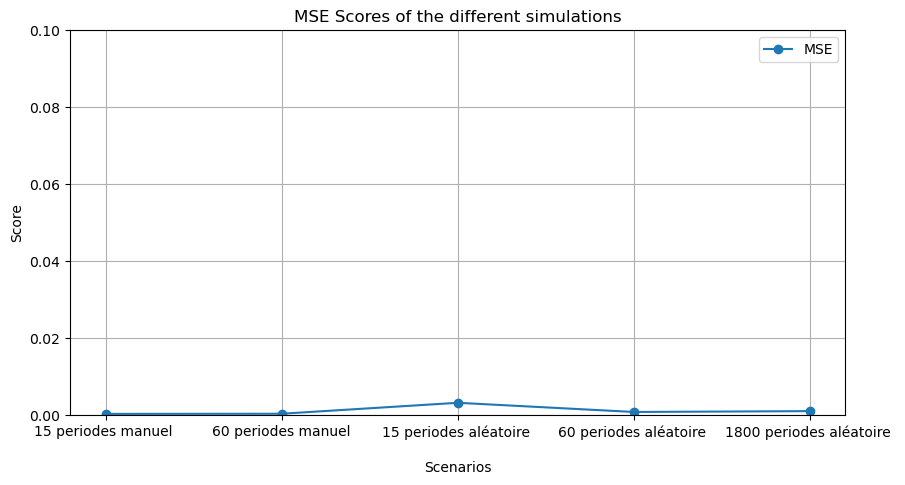

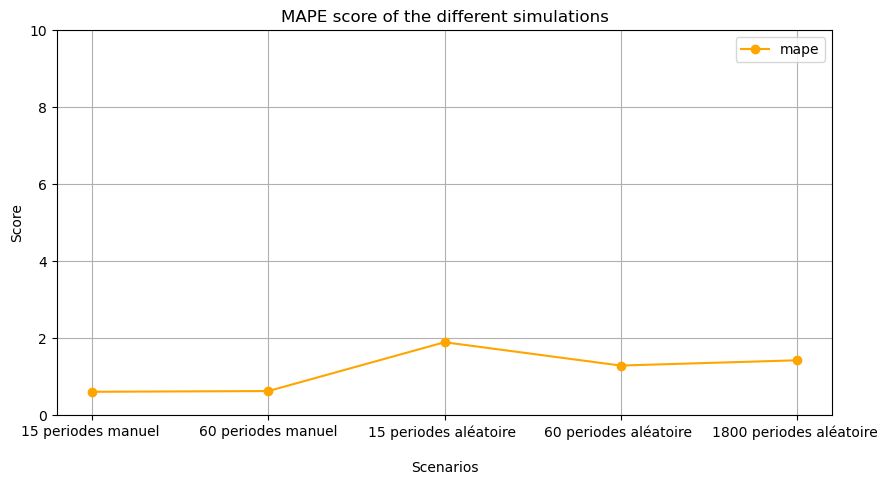

In [15]:
# Plot the scores
plt.figure(figsize=(10, 5))
plt.plot(datasets, mse_scores, label='MSE', marker='o')
plt.xlabel('Scenarios')
plt.ylabel('Score')
plt.title('MSE Scores of the different simulations')
plt.ylim(0, 0.1)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(datasets, mape_scores, label='mape', marker='o', c="orange")
plt.xlabel('Scenarios')
plt.ylabel('Score')
plt.title('MAPE score of the different simulations')
plt.ylim(0, 10)
plt.legend()
plt.grid(True)
plt.show()

# Test 2 - MSE et MAPE en fonction des attaques par periode

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

def graph_per_periode(df, comp) :
    
    # Initialize lists to store results
    periods = []
    mse_scores = []
    mape_scores = []
    malicious_counts = []

    # Process each period
    unique_periods = df['periode'].unique()

    for period in unique_periods:
    
        #feature / Label for the periode selected
        df_period = df[df['periode'] == period]
        X = df_period[['Recente', 'Ancienne']]
        y = df_period['label_experience']
        
        # Prediction and scores
        predictions = np.dot(X, coeffs[i-1])
        mse = mean_squared_error(y, predictions)
        mape = MAPE(y, predictions)
        
        # Store the results
        periods.append(period)
        mse_scores.append(mse)
        mape_scores.append(mape)
 
    if comp == 1: 
        titre = '15 periodes manuel \n'
        malicious_counts = malicious_counts_15p
    elif comp == 2: 
        titre = '60 periodes manuel\n'
        malicious_counts = malicious_counts_60p
    elif comp == 3: 
        titre = '15 periodes aléatoire \n'
        malicious_counts = malicious_counts_rand_15p
    elif comp == 4: 
        titre = '60 periodes aléatoire \n'
        malicious_counts = malicious_counts_rand_60p
    elif comp == 5: 
        titre = '1800 periodes aléatoire \n'
        malicious_counts = malicious_counts_rand_1800p
        
        
    # Plot the MSE results
    plt.figure(figsize=(12, 6))
    plt.scatter(malicious_counts, mse_scores, label='MSE', marker='o', color='red')
    plt.xlabel("nombre d'attaques (Malicious Nodes) par periode")
    plt.ylabel('MSE Score')
    plt.title(f"MSE Score vs nombre d'attaques par periode for {titre}")
    #plt.legend()
    plt.grid(True)
    plt.ylim(0, 0.1)
    plt.show()

    
    # Plot the MAPE results
    plt.figure(figsize=(12, 6))
    plt.scatter(malicious_counts, mape_scores, label='MAPE Score', marker='o', color='blue')
    plt.xlabel("nombre d'attaques (Malicious Nodes) par periode")
    plt.ylabel('mape Score')
    plt.title(f"mape Score vs nombre d'attaques par periode for {titre}")
    #plt.legend()
    plt.grid(True)
    plt.ylim(0, 10)
    plt.show() 

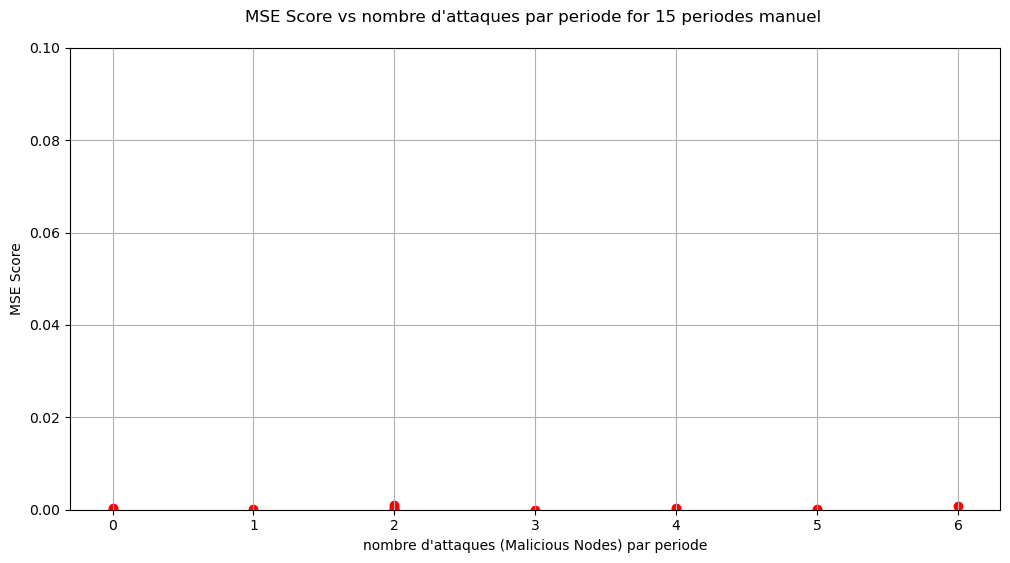

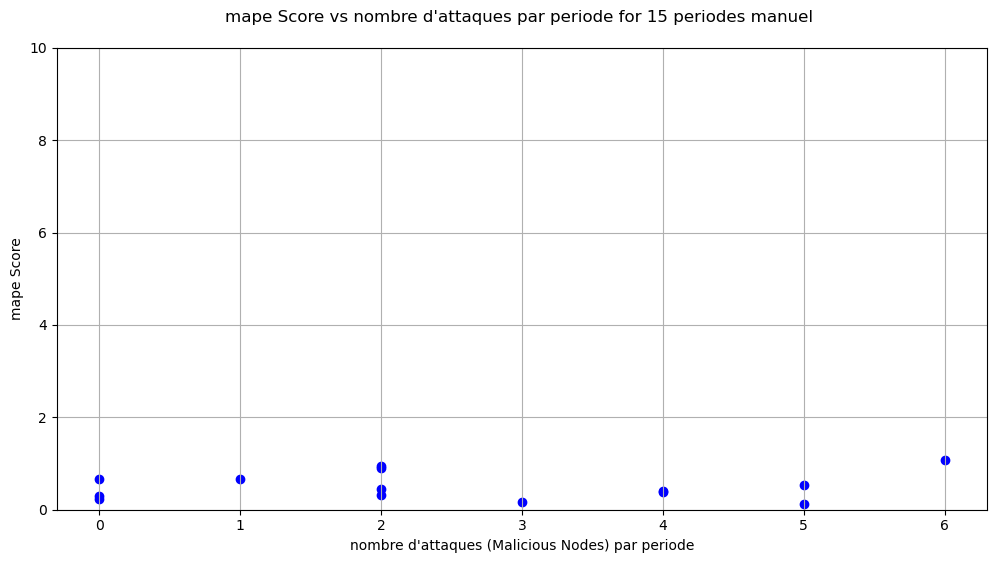

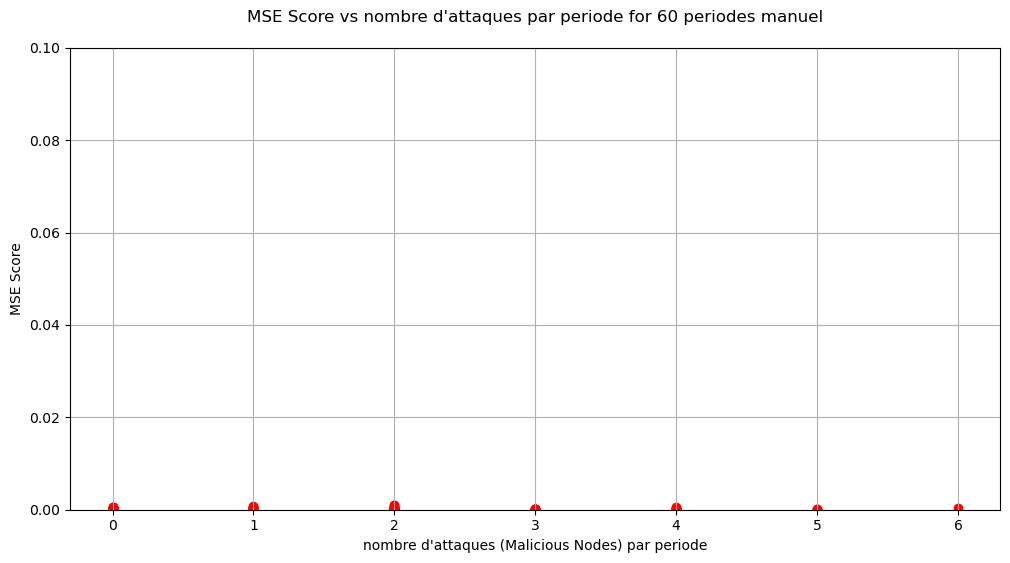

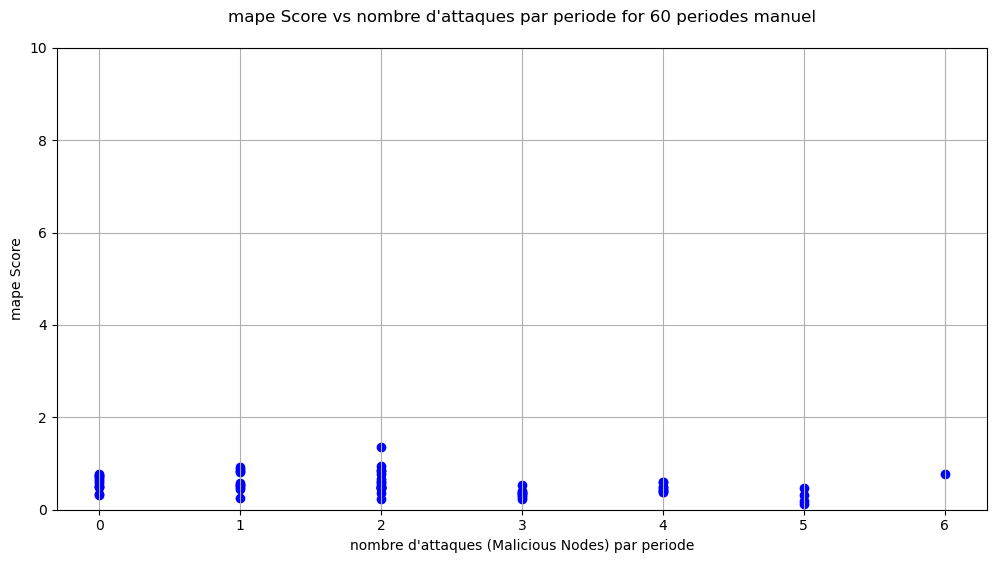

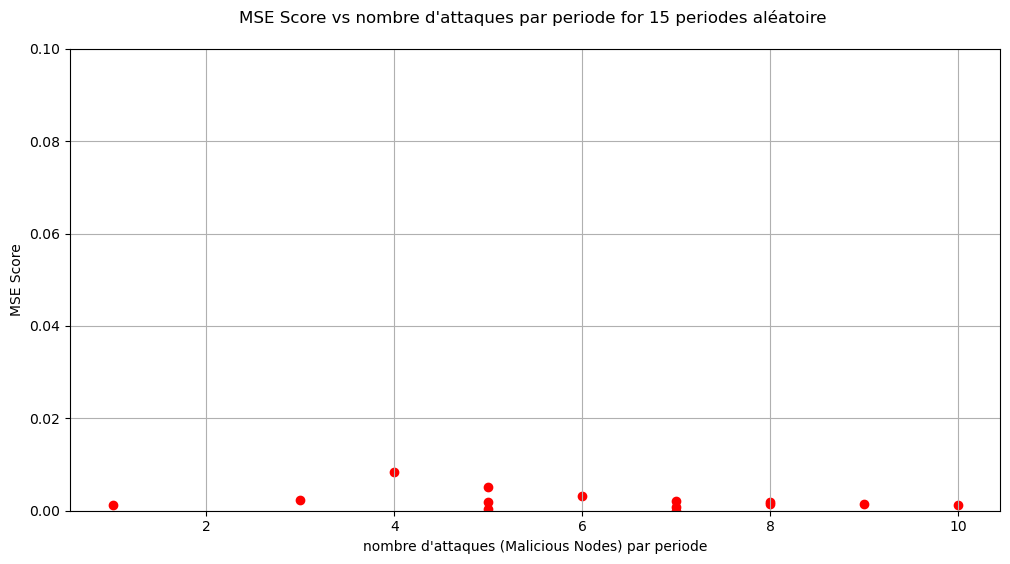

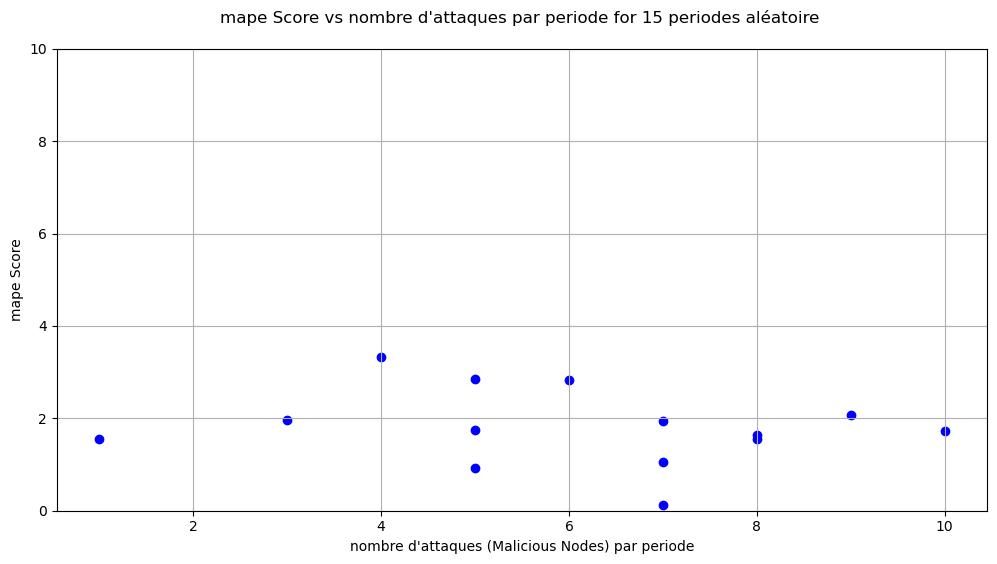

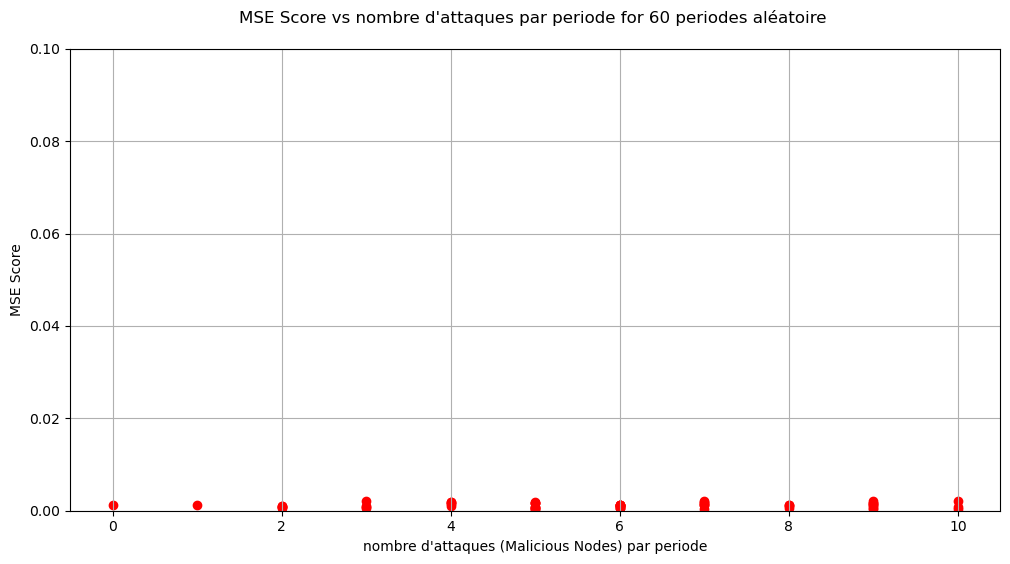

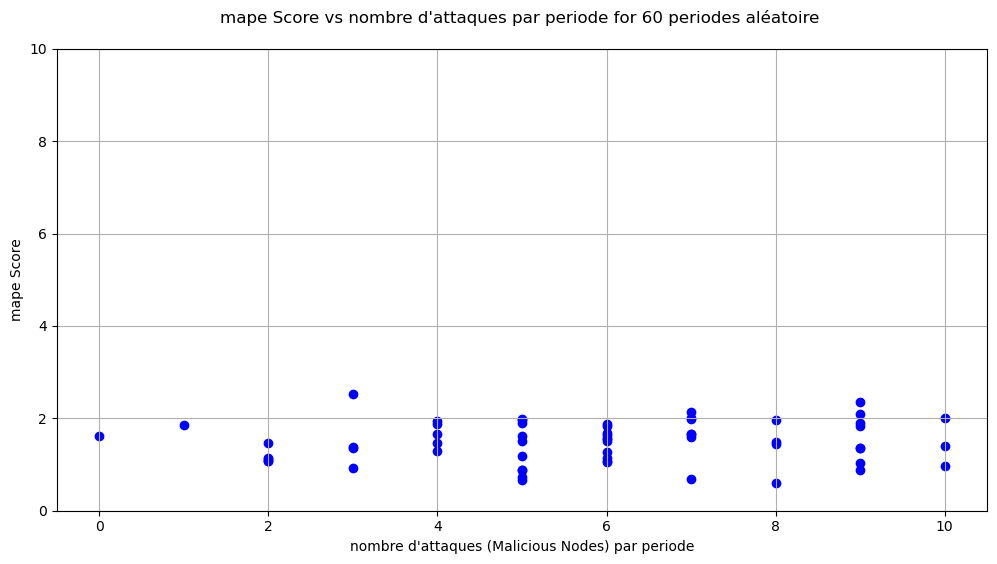

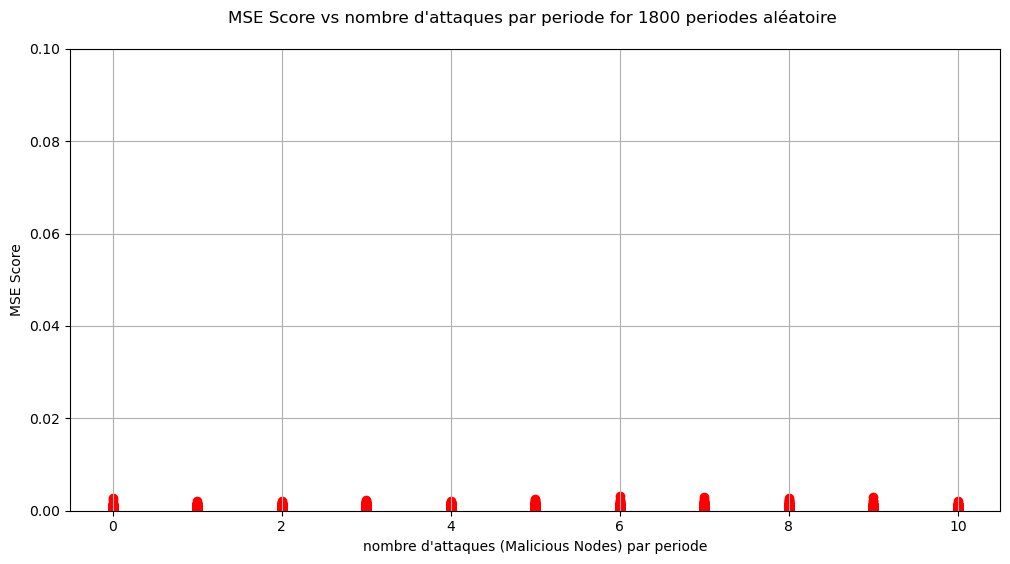

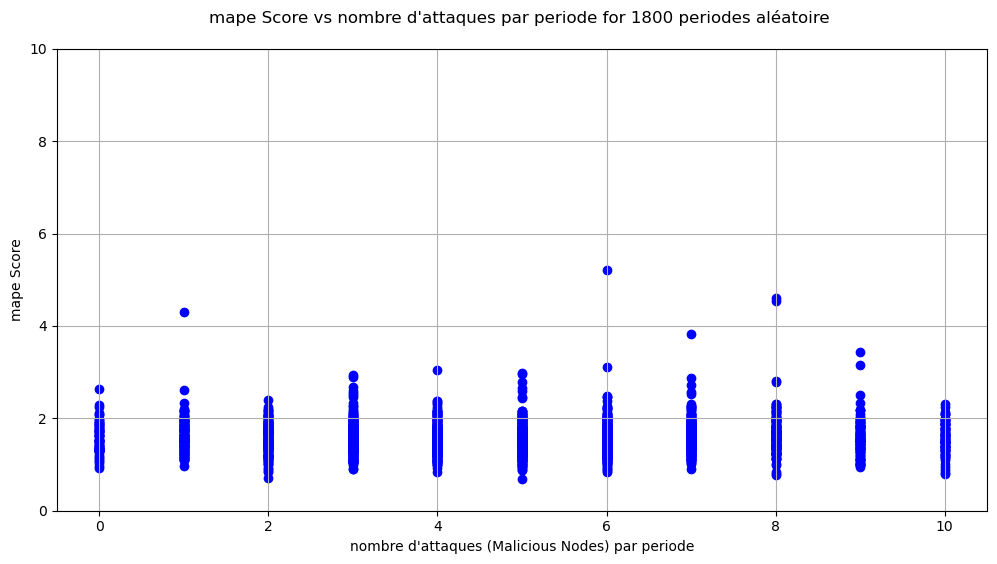

In [44]:
i = 1
for data in datas :
    graph_per_periode(data, i)
    i = i + 1

# Test 3 - erreurs de prediction en fonction du Label

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def view(df, comp):
    if comp == 1: 
        titre = '15 periodes manuel \n'
    elif comp == 2: 
        titre = '60 periodes manuel\n'
    elif comp == 3: 
        titre = '15 periodes aléatoire \n'
    elif comp == 4: 
        titre = '60 periodes aléatoire \n'
    elif comp == 5: 
        titre = '1800 periodes aléatoire \n'

    # Initialize lists to store results
    mse_scores = []
    mape_scores = []
    label_ranges = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
    
    # Segment the data based on 'Label'
    df_segments = [
        df[df['label_experience'] < 0.1],
        df[(df['label_experience'] >= 0.1) & (df['label_experience'] < 0.2)],
        df[(df['label_experience'] >= 0.2) & (df['label_experience'] < 0.3)],
        df[(df['label_experience'] >= 0.3) & (df['label_experience'] < 0.4)],
        df[(df['label_experience'] >= 0.4) & (df['label_experience'] < 0.5)],
        df[(df['label_experience'] >= 0.5) & (df['label_experience'] < 0.6)],
        df[(df['label_experience'] >= 0.6) & (df['label_experience'] < 0.7)],
        df[(df['label_experience'] >= 0.7) & (df['label_experience'] < 0.8)],
        df[(df['label_experience'] >= 0.8) & (df['label_experience'] < 0.9)],
        df[(df['label_experience'] >= 0.9) & (df['label_experience'] <= 1)]
    ]

    for segment in df_segments:
        if segment.empty:
            mse_scores.append(0)
            mape_scores.append(0)
        else:
            X = segment[['Recente', 'Ancienne']]
            y = segment['label_experience']
            
            # Prediction and scores
            predictions = np.dot(X, coeffs[i-1])
            mse = mean_squared_error(y, predictions)
            mape = MAPE(y, predictions)
            
            # Store the results
            mse_scores.append(mse)
            mape_scores.append(mape)
 
    # Plot the MSE results
    plt.figure(figsize=(12, 6))
    plt.scatter(label_ranges, mse_scores, label='MSE', marker='o', color='red')
    plt.xlabel("Label Ranges")
    plt.ylabel('MSE Score')
    plt.title(f"MSE Score vs Label Ranges for {titre}")
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 0.5)
    plt.show()

    # Plot the MAPE results
    plt.figure(figsize=(12, 6))
    plt.scatter(label_ranges, mape_scores, label='MAPE', marker='o', color='blue')
    plt.xlabel("Label Ranges")
    plt.ylabel('MAPE Score')
    plt.title(f"MAPE Score vs Label Ranges for {titre}")
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 20)
    plt.show()


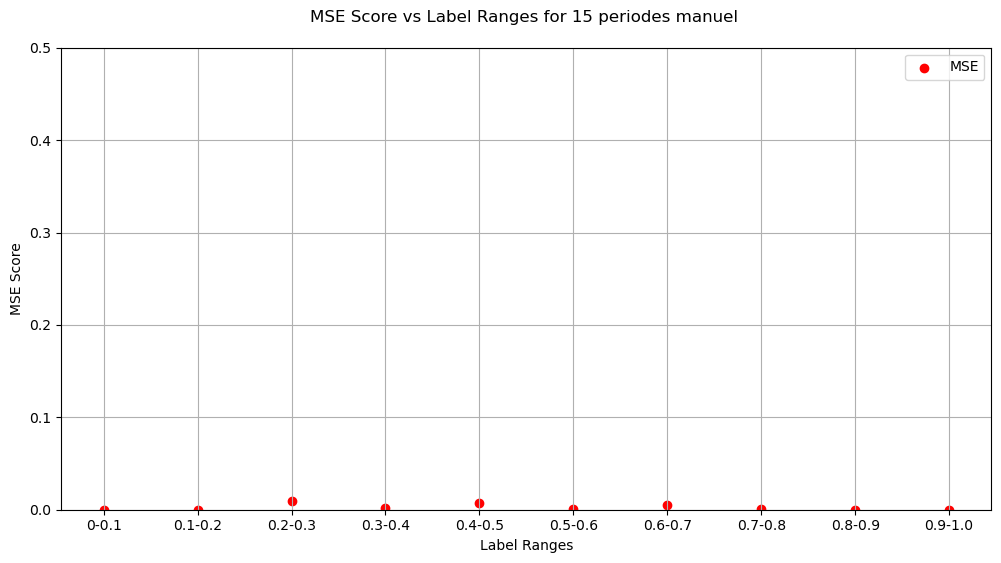

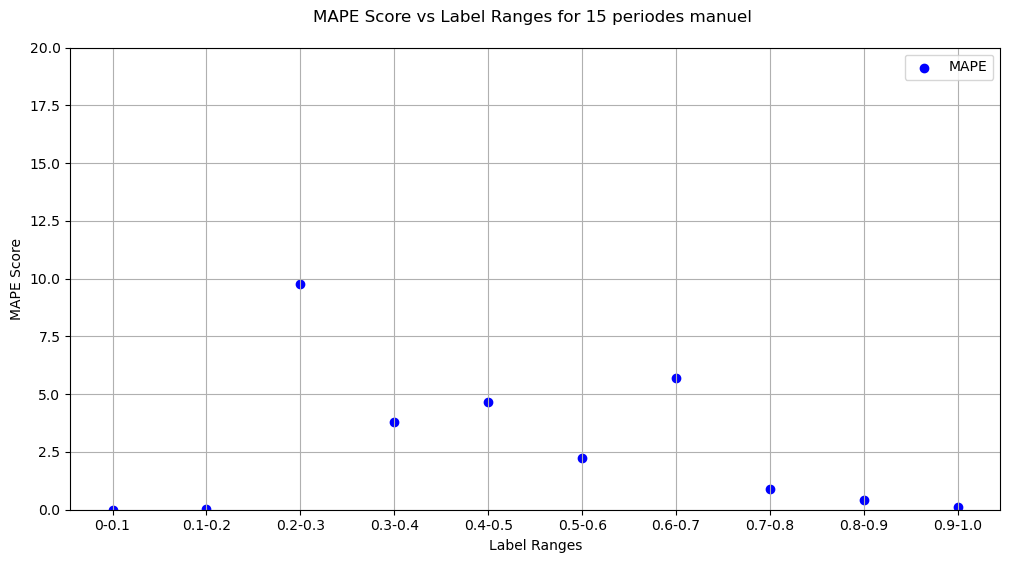

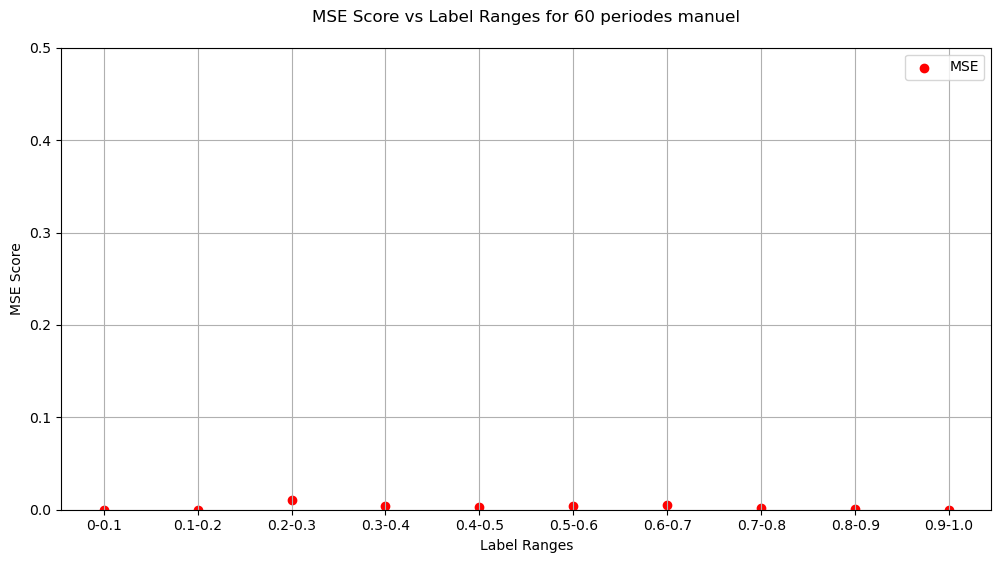

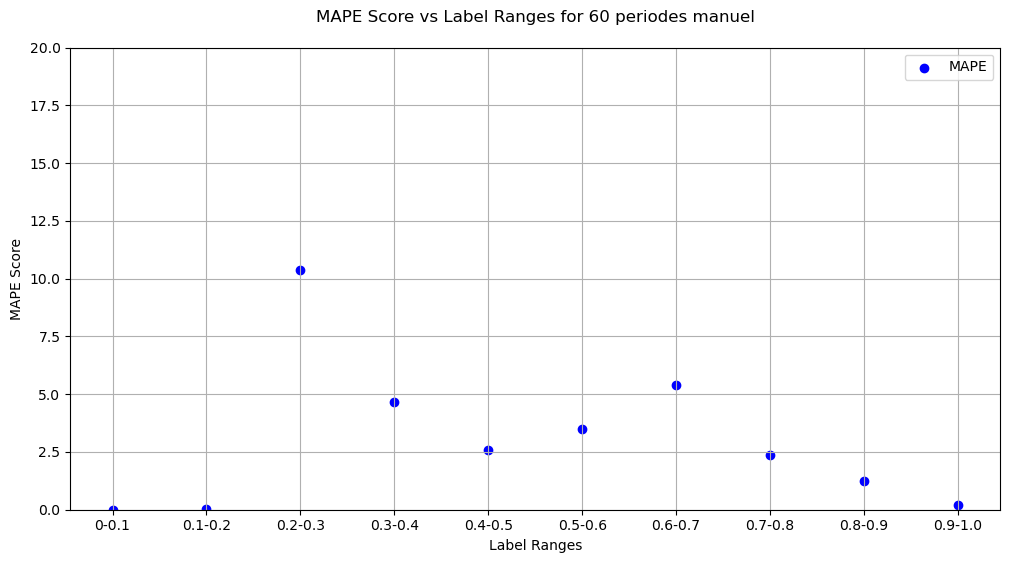

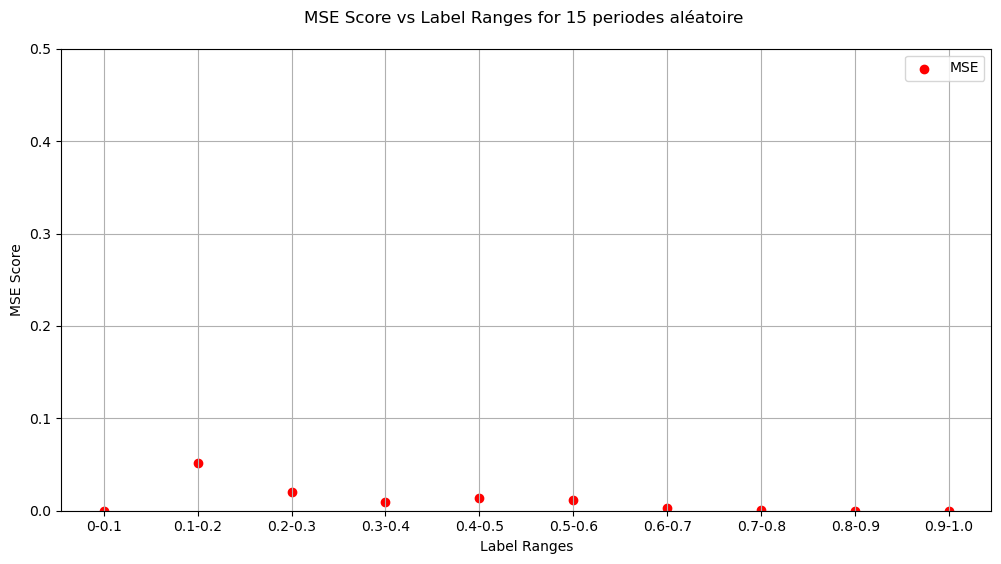

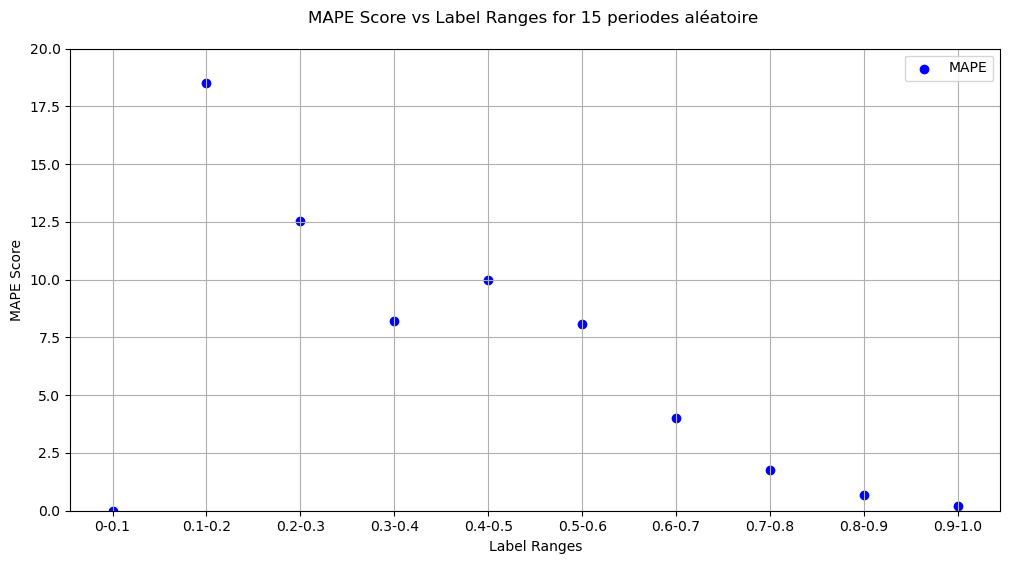

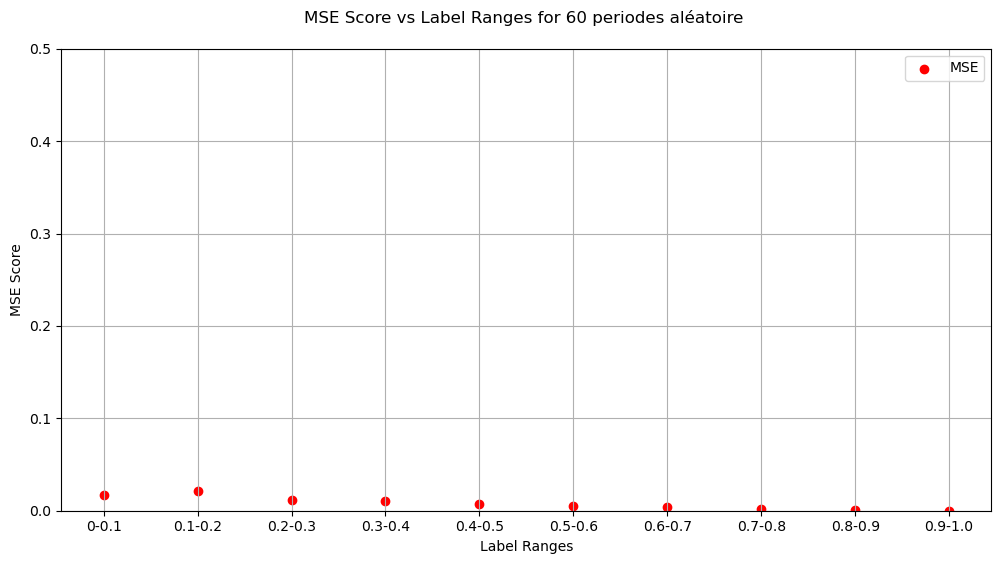

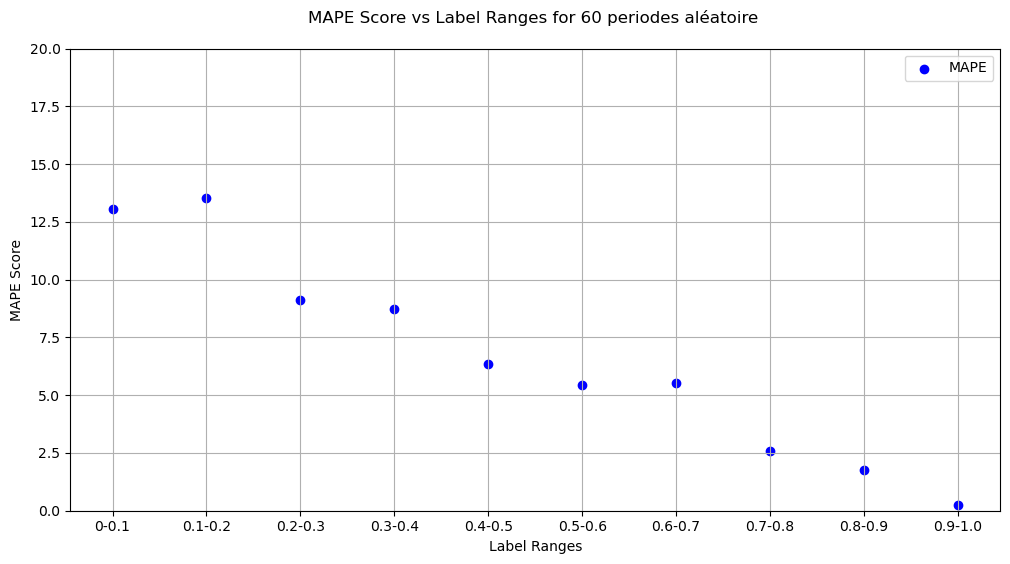

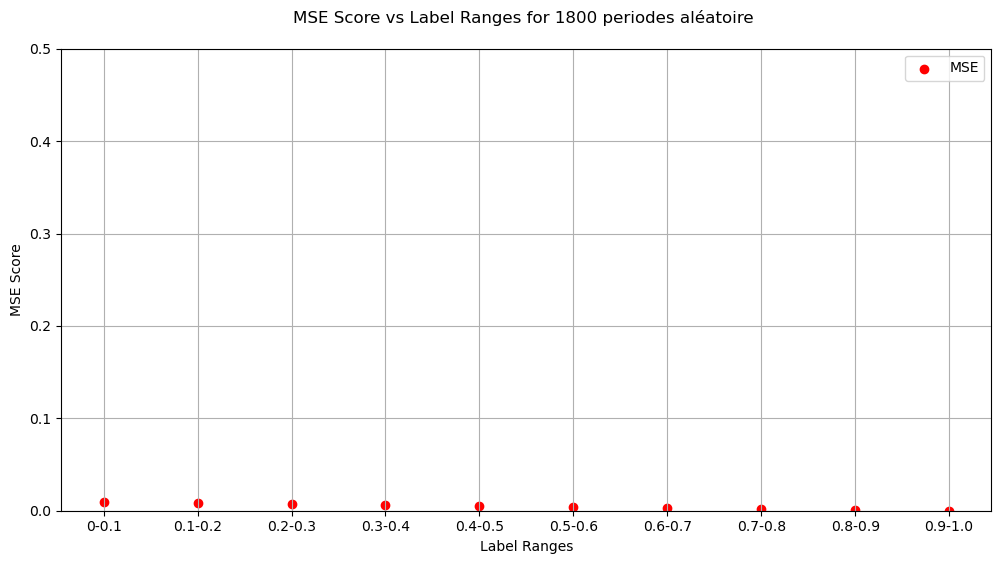

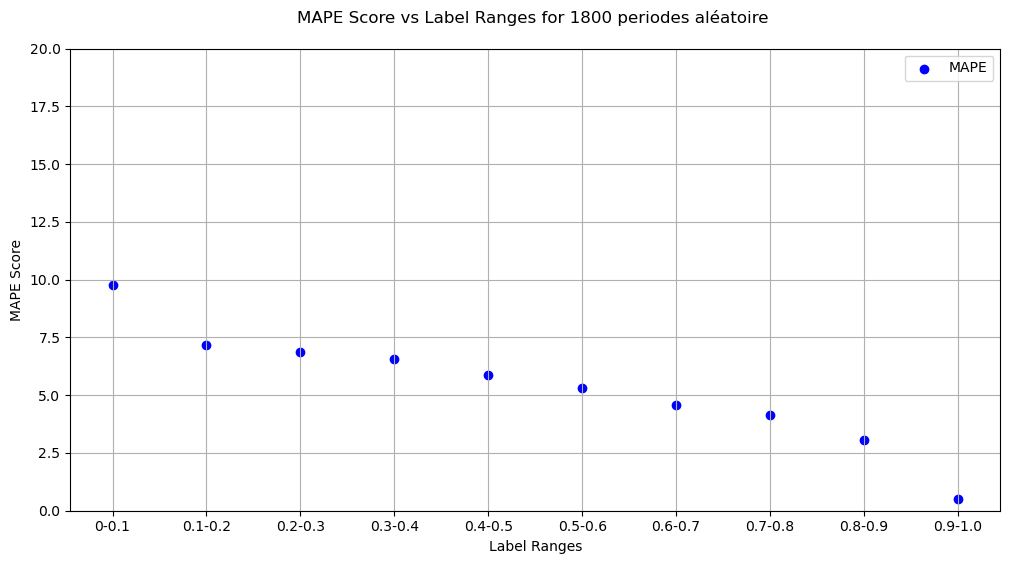

In [46]:
i = 1
for data in datas :
    view(data, i)
    i += 1